# Week 3: Day 5 PM // Forecasting

## Autoregressive Model

An autoregressive (AR) model uses a linear combination of past values of the target to make forecasts. Of course, the regression is made against the target itself. Generally, AR model has following the mathematical expression below:

$$ R_t = \mu +\phi R_{t-1} + \epsilon_t $$

- $\mu $ is mean
- $ \phi$ is a fraction which the value lies between -1 to 1 
- $ R_{t-1}$ is the prior's/yesterday's value
- $ \epsilon_t$ is noise

The equation above is the 1-order autoregressive model or AR(1). You can model the data using the high order models or adding more lags. The mathematical equation could be:
- $AR(2): R_t=\mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} +\epsilon_t$
- $AR(3): R_t=\mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} +\epsilon_t$
- ... so on

To forecast a time series data using AR model, we can use an ARMA class which provided in statsmodels.tsa.arima_model. Note that ARMA model involves autoregressive and moving average. To set that only AR model you use, you can set the order arguments, order=(AR_order,MA_order). For AR(1) we can state the arguments to order=(1,0), AR(2) to order=(2,0), and so on.

-----------
Warning from statsmodels dev:

statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/fahmimn21/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


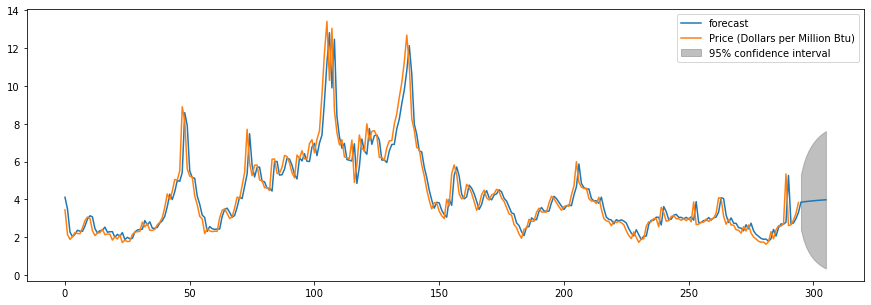

In [1]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)


# Forecast the first AR(1) model
mod = ARMA(nat_gas, order=(1,0)) #set AR_order to 1 for AR(1) model, another is 0
res = mod.fit()
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(nat_gas)+10,ax=ax)
plt.show()


In [2]:
res.aic

673.0242008329094

## Moving Average

A moving average (MA) model computes the average of different subset of the time series data. Generally, MA model has following the mathematical expression below:

$$ R_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$$

- $\mu $ is mean
- $ \epsilon_t$ is noise
- $ \theta$ is a fraction theta of yesterday's noise


The equation above is the 1-order moving average model or MA(1). The higher order formats are the same as AR model.

To forecast a time series data using MA model, we can use the same class as AR but only set AR_order to 0 and MA_order greater than 0. For MA(1) we can state the arguments to order=(0,1), MA(2) to order=(0,2), and so on.

-----------
Warning from statsmodels dev:

statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

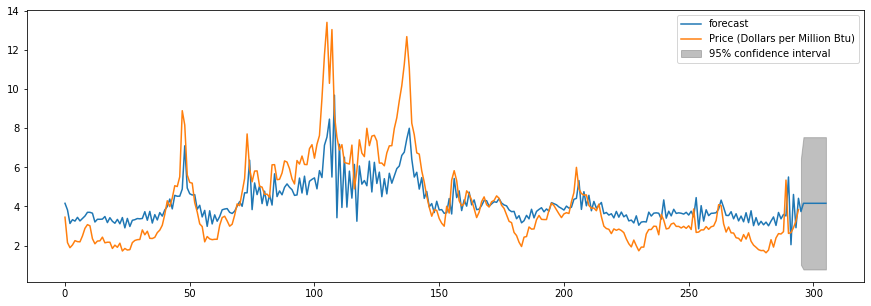

In [3]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)


# Forecast the first MA(1) model
mod = ARMA(nat_gas, order=(0,1)) #set MA_order to 1 for MA(1) model, another is 0
res = mod.fit()
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(nat_gas)+10,ax=ax)
plt.show()

In [4]:
res.aic

1039.2114196767773

## Autoregressive Moving Average (ARMA)

ARMA is a combination between autoregressive and moving average model. We use the same class as AR or MA to forecast a time series data using ARMA model. Since it is a combination of two models, we need to set the values of AR_order and MA_order (Usually in other references they symbolized by p and q respectively) in the order argument. To do the forecast the previous data (natural gas), let's look at the code below.

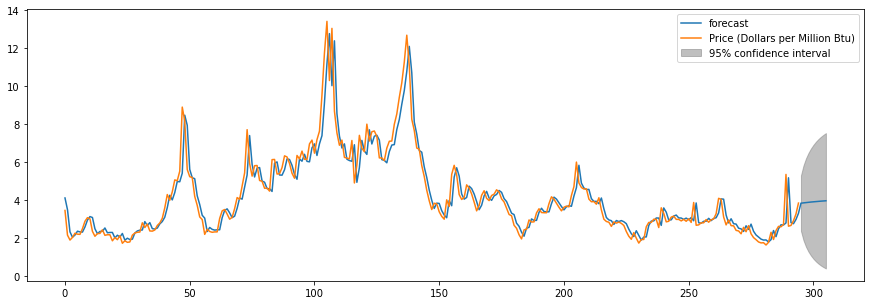

In [5]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)


# Forecast the first MA(1) model
mod = ARMA(nat_gas, order=(1,1)) #set MA_order to 1 for MA(1) model, another is 0
res = mod.fit()
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(nat_gas)+10,ax=ax)
plt.show()

In [6]:
res.aic

674.5682881341494

The forecasts above may not look very impressive, as it is almost a straight line. This is because this is a very simple, univariate forecasting model. Nonetheless, keep in mind that these simple forecasting models can be extremely competitive.

## Choosing the Right Model

The result of ARMA and AR may almost fit into the natural gas data. It didn't show on MA model. The question are how do we determine which best model to fit our data? and then what order we should use?. Moreover, we need to test our model using Akaike's Information Criterion (AIC). Mathematically, AIC can be written by:
$$ AIC=-2\log{L}+2k $$
- L is the likelihood of the data
- k s the number of parameters with formula: k=p+q+1, for AR(1), p=1,q=0 and for MA(1), p=0,q=1

simply, we want to select a model with the lowest AIC value compared to other models. To measure the AIC value of the model, we only calling the .aic attribute following the fitting result after we fit the data with the model. To understand how to do that in Python, let's check the code below.

In [4]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)

mod = ARMA(nat_gas, order=(1,1)) #set MA_order to 1 for MA(1) model, another is 0
res=mod.fit()

print('The AIC is',res.aic)

The AIC is 671.3840956561794


The aim to find the best model that has the lowest aic, we need to comparing a model to others, so we need build some script to perform our need that is to find which model that has the lowest aic. In the cell below, we will include AR,MA, and ARMA models. We just set the (p,q) value. In the example below we set arrays of p and q of integer number 0-5.

In [9]:
def find_best_model(data,num_p,num_q):
    df=pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
    pq=[[],[]] #This list for storing the combinations of p and q
    aic=[] # This list for storing aic value
    for p in range(num_p+1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
        for q in range(num_q+1):
            if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
                try: #Using exception to avoid the error while training the model with certain p and q value
                    model=ARMA(data,order=(p,q))
                    result=model.fit()
                    pq[0].append(p)
                    pq[1].append(q)
                    aic.append(result.aic)
                except:
                    pass #If there is an error caused by the calculation, it will be skipped to the next iteration
    df['p']=pq[0]
    df['q']=pq[1]
    df['AIC']=aic
    
    df.sort_values('AIC',inplace=True)
    
    return df.p.iloc[0],df.q.iloc[0],df.AIC.iloc[0],df

In [10]:
# Ignoring ARMA warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA


nat_gas=pd.read_excel('https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls',sheet_name='Data 1',header=2)
nat_gas.columns=['Date','Price (Dollars per Million Btu)']
nat_gas.Date=pd.to_datetime(nat_gas.Date)
nat_gas.set_index('Date',inplace=True)

p,q,AIC,df=find_best_model(nat_gas,5,5)

print('The best model is that has p={} and q={} with AIC={}'.format(p,q,AIC))

The best model is that has p=4 and q=3 with AIC=669.6104014909504


In [11]:
df

,p,q,AIC
17,4,3,669.610401
5,2,1,670.341386
18,4,4,671.083374
8,2,4,672.231332
10,3,1,672.248633
20,5,1,672.361115
19,4,5,672.926219
22,5,3,672.938579
23,5,4,673.477122
21,5,2,673.772068


The best model for fitting our data that has the lowest AIC is ARMA(4,4)